##### Grading Feedback Cell
So far this has been the best assignment. Keep up the good work!
100%

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Yash Pasar
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- __Do not change homework file names.__ The FAs and the professor use these names to grade your homework.  Changing file names may result in a point reduction penalty.
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include a title, and axis labels.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.

In [1]:
# import all needed packages in this cell
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

**Question 1 (10 pts)** Write a function named reverse_by_three that receives a numpy array, python list, or tuple as an input argument and starting at the 2nd from last element, returns every 3rd element of the list in reverse order.  It is legal to return an empty python list, numpy array, or tuple if the input.  Use slicing syntax exclusively to perform the operations.  Your code should be efficient as possible and not use a lot of extraneous un-needed code in the solution.

In [2]:
# Create the function reverse_by_three here
def reverse_by_three(array):
    return array[-2::-3]
# array[start:stop:step]
# starting at the 2nd from last element --> start=-2
# returns every 3rd element of the list in reverse order --> step=-3

In [3]:
# For grading use only (question 1)
reverse_by_three(np.array([1,2,3,4,5,6]))

array([5, 2])

##### Grading Feedback Cell

**Question 2 (10 pts)** Create a python class named my_statistics.  The my_statisitics class should require a single numpy array argument in its constructor.  Implement the following statistical methods in the my_statistics class: get_mean, get_pop_std, get_sample_std, get_min, and get_max.  The get_pop_std method shall return the standard deviation assuming the constructor argument is a complete population.  The get_sample_std method shall return the standard deviation assuming that the constructor argument is a sample of a population.  The get_min and get_max methods shall return the min and max of the constructor argument respectively.  The get_mean method shall return the mean.  Return a 'None' type if the constructor argument would cause an error for the specified operation.  Use numpy functions to perform the statistical calculations.

In [4]:
# create the my_statistics class here
# YOUR CODE HERE
class my_statistics:
  def __init__(self,array):
    self.array = array
  def get_mean(self):
    return np.mean(self.array)
  def get_pop_std(self):
    return np.std(self.array) 
    # By default, numpy.std returns the population standard deviation. By default ddof is zero.
    # ddof means Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. 
  def get_sample_std(self):
    return np.std(self.array,ddof=1)
  def get_min(self):
    return np.min(self.array)
  def get_max(self):
    return np.max(self.array)

In [5]:
# For grading use only (question 2)
stats_data = np.array([12, 17, 9, 13, -5, -7, -9, -11, 39, 42, 17, 2, 99, 1, -310])
my_stats = my_statistics(stats_data)
print(my_stats.get_mean())
print(my_stats.get_pop_std())
print(my_stats.get_sample_std())
print(my_stats.get_min())
print(my_stats.get_max())

-6.066666666666666
85.59086140211205
88.59495847206355
-310
99


##### Grading Feedback Cell

**Question 3 (30 pts)** Create a function named monte_hall that takes as an argument the number of times to iterate a monte-carlo simulation of the Monte Hall problem with 4 doors and 1 prize.   (https://en.wikipedia.org/wiki/Monty_Hall_problem).   
For simplicity, you can assume that the game player always initially chooses door A and the host will open one door.  The prize may be behind any of the 4 doors.  The monte_hall function should print answers to the following 2 questions:  Based on the simulation, what is the probability of winning if you switch doors, and what is the probability of winning if you keep door A?  Your function should return these values in a tuple (prob_win_if_switch, prob_win_if_keep).

In [6]:
# monte_hall function here
def monte_hall(times):
    win_if_keep=0          # if keep, how many times the player wins
    win_if_switch=0        # if keep, how many times the player wins
    doors = [0,1,2,3]      # there are 4 doors in this game
    for x in range(times):  
        prize = random.choice(doors)  # random choose one door that has prize
                                      # random.choice() returns a random element from the non-empty sequence. 
                                      # sequence can be a list, string, tuple.
                                      # this function returns a single item from the sequence.
        player_choice = 0           # the game player always initially chooses door A 
        goats = set(doors) - set([prize])    # doors that have goats behind it.
                                             # returns the elements included in doors, but not included in prize.
        remaining = set(doors) - set([player_choice])  # the reaming doors are the doors that player doesn't choose
        host_open = random.choice(list(goats.intersection(remaining))) 
                                             # the host will open one door that has a goat in the remaining doors
                                             # intersection returns a set which is the intersection of goats and remaining doors
        if player_choice == prize:           # if player chooses the door with prize and keep his choice
            win_if_keep = win_if_keep + 1    # add one to the count of how many times the player wins if keep
        
        player_newchoice = (set(doors) - set([player_choice]) - set([host_open])).pop()
                                                # if player choose another door
        if player_newchoice == prize:           # and the new door has prize behind it
            win_if_switch = win_if_switch + 1   # add one to the count of how many times the player wins if switch
    prob_win_if_switch=win_if_switch/times*100  # the probability of winning if you switch doors
    prob_win_if_keep=win_if_keep/times*100      # the probability of winning if you keep door A
    return '{0:.2f}%'.format(prob_win_if_switch),'{0:.2f}%'.format(prob_win_if_keep)

In [32]:
# For grading use only (question 3)
print(monte_hall(10000))

('37.81%', '24.08%')


##### Grading Feedback Cell

##### **Question 4 (10 pts)** Create a numpy array containing 10,000 samples of random normal data with a mean of 5 and a variance of 4.  Plot a histogram of the data using matplotlib.

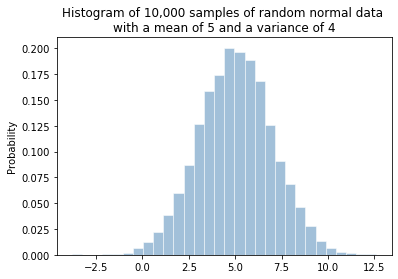

In [8]:
# # your histogram plot code here
# define random normal characteristics
mu = 5
sigma = math.sqrt(4)

# create an array of random normal data
rand_normal = np.random.normal(size=10000, loc=mu, scale=sigma)

_, bins, _ = plt.hist(rand_normal, density=True, alpha=0.5, color='steelblue',edgecolor='white',bins=30,label='abc')
plt.title('Histogram of 10,000 samples of random normal data \nwith a mean of 5 and a variance of 4')
plt.ylabel('Probability')
plt.show()

##### Grading Feedback Cell
Nice histogram!

#### Question 5 (10 pts) The below cell creates a pandas dataframe called iris_df.  Write a function named plot_iris_grid that uses matplotlib to create a grid of 16 scatter plots of all combinatations of the columns in the iris_df data frame.  For example, the first row should be sepal len vs sepal len, sepal len vs sepal width, sepal len vs petal len, sepal len vs petal width.

In [9]:
# plot_iris_grid code here
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


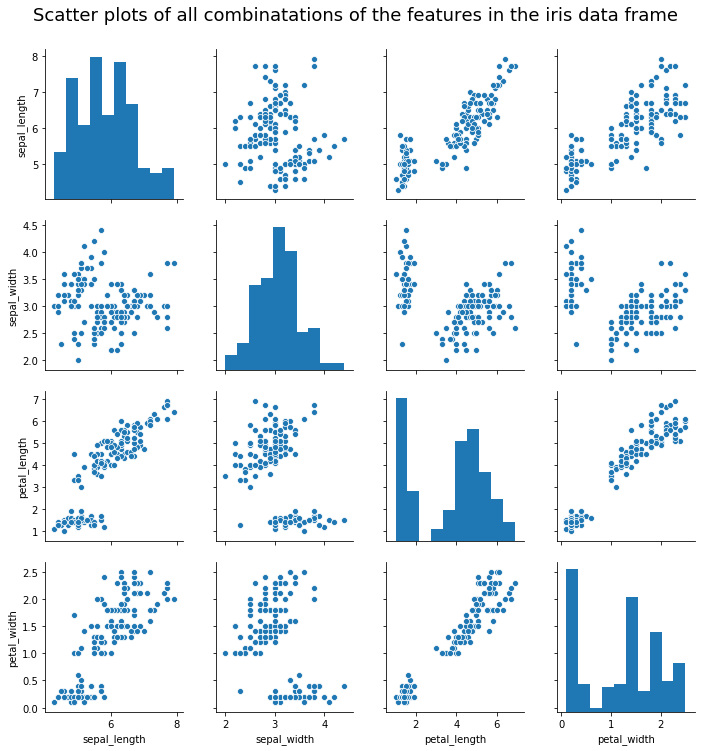

In [11]:
# method 1: using sns pairplot
# where histograms are plotted for the features against its self.
def plot_iris_grid(data):
    p=sns.pairplot(data)
    p.fig.text(0.05, 1.02,'Scatter plots of all combinatations of the features in the iris data frame', fontsize=18)
plot_iris_grid(iris)

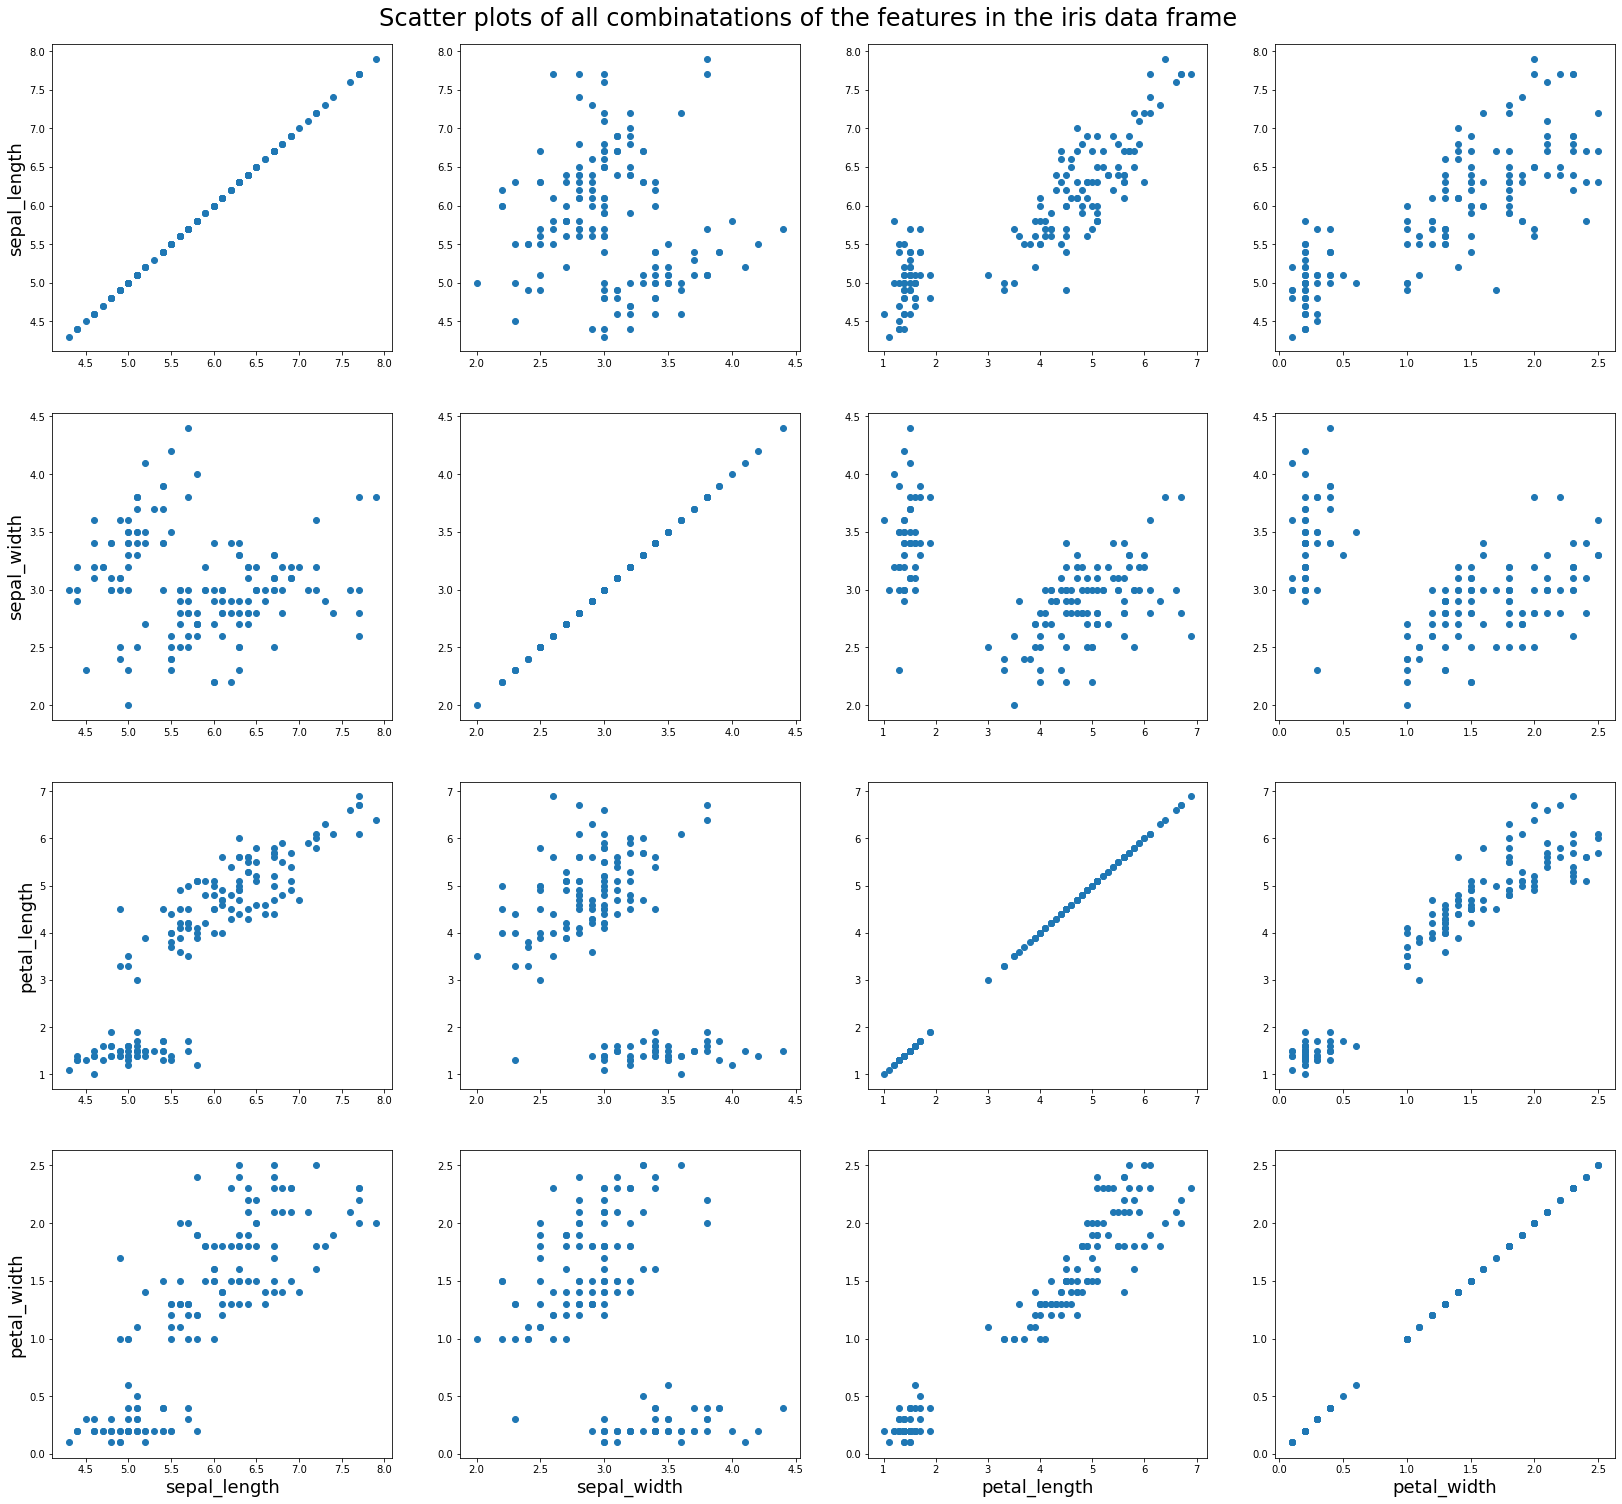

In [12]:
# method 2: using subplots
# where scatter plots are plotted for the features against its self.
def plot_iris_grid_2(iris):
    #title='Scatter plots of all combinatations of the features in the iris data frame'
    fig, axes = plt.subplots(4, 4, figsize=(28, 26), sharex=False, sharey=False)
    fig.suptitle('Scatter plots of all combinatations of the features in the iris data frame', fontsize=24,x=0.5,y=0.9)
# 
    #fig.title('Scatter plots of all combinatations of the features in the iris data frame')
#     text(0.5, 0.05,'Scatter plots of all combinatations of the features in the iris data frame', fontsize=18)
    #plt.
    # the first row 
    axes[0,0].scatter(iris.iloc[:,0], iris.iloc[:,0])
    axes[0,1].scatter(iris.iloc[:,1], iris.iloc[:,0])
    axes[0,2].scatter(iris.iloc[:,2], iris.iloc[:,0])
    axes[0,3].scatter(iris.iloc[:,3], iris.iloc[:,0])
    axes[0,0].set_ylabel('sepal_length',fontsize=18)
    
    
    # the second row 
    axes[1,0].scatter(iris.iloc[:,0], iris.iloc[:,1])
    axes[1,1].scatter(iris.iloc[:,1], iris.iloc[:,1])
    axes[1,2].scatter(iris.iloc[:,2], iris.iloc[:,1])
    axes[1,3].scatter(iris.iloc[:,3], iris.iloc[:,1])
    axes[1,0].set_ylabel('sepal_width',fontsize=18)

    # the third row 
    axes[2,0].scatter(iris.iloc[:,0], iris.iloc[:,2])
    axes[2,1].scatter(iris.iloc[:,1], iris.iloc[:,2])
    axes[2,2].scatter(iris.iloc[:,2], iris.iloc[:,2])
    axes[2,3].scatter(iris.iloc[:,3], iris.iloc[:,2])
    axes[2,0].set_ylabel('petal_length',fontsize=18)

    # the fourth row 
    axes[3,0].scatter(iris.iloc[:,0], iris.iloc[:,3])
    axes[3,1].scatter(iris.iloc[:,1], iris.iloc[:,3])
    axes[3,2].scatter(iris.iloc[:,2], iris.iloc[:,3])
    axes[3,3].scatter(iris.iloc[:,3], iris.iloc[:,3])
    axes[3,0].set_ylabel('petal_width',fontsize=18)
    
    axes[3,0].set_xlabel('sepal_length',fontsize=18)
    axes[3,1].set_xlabel('sepal_width',fontsize=18)
    axes[3,2].set_xlabel('petal_length',fontsize=18)
    axes[3,3].set_xlabel('petal_width',fontsize=18)


    plt.show()

plot_iris_grid_2(iris)

##### Grading Feedback Cell
Great efforts and good work on all the visualizations!!

#### Question 6 (20 pts) Pandas

6a (4 pts): Read the supplied potholes_2016.csv file into a pandas dataframe named potholes.  Save the shape of the potholes dataframe in a variable named potholes_shape.  Display the potholes_shape variable.  Display the head of the potholes dataframe.  

In [13]:
# Create potholes dataframe, potholes_shape variables here
potholes=pd.read_csv('potholes_2016.csv')
potholes_shape=potholes.shape
print(potholes_shape)
potholes.head()

(7488, 10)


,StreetNumber,StreetName,StreetNamePostType,Directional,strLocation,dtTime,streetID,VehicleName,Latitude,Longitude
0,215,COMSTOCK,AVE,,215 COMSTOCK AVE & HARRISON S,4/14/2016 8:57,12578124,DP2,-76.130140,43.044159
1,700,MIDLAND,AVE,,700-06 MIDLAND AVE & CASTLE ST W,4/15/2016 9:01,12573231,DP1,-76.154074,43.031314
2,1604,GRANT,BLVD,,1604-08 GRANT BLVD & WOODRUFF AVE,4/15/2016 13:03,12580306,DP1,-76.138284,43.072356
3,261,HOPPER,RD,,261 HOPPER RD,4/18/2016 10:39,12571704,DP2,-76.159681,42.998028
4,1821,VALLEY,DR,,1821 VALLEY DR & CHAFFEE AVE E,4/18/2016 10:52,12571710,DP2,-76.152482,42.997837


In [14]:
# for grading use only (question 6a)


##### Grading Feedback Cell

6b (4 pts): Count the total number of NAN values in the potholes dataframe and store in a variable named total_nan.  Print the total_nan variable.

In [15]:
# Your nan count code here
total_nan=potholes.isnull().sum().sum()
print(total_nan)

0


In [16]:
# I got 0 for this question but I think it is more meaningful to find the missing values
# So I converted empty cells into NAN to get the number of missing values
# Below are the codes I used, there are 5495 missing values in this dataframe

potholes['Directional']=potholes['Directional'].apply(lambda x: np.NaN if str(x).isspace() else x) # convert the empty strings to NaN values
#potholes=potholes.apply(lambda x: np.NaN if str(x).isspace() else x,axis=0) # convert the empty strings to NaN values

# potholes.head()
total_missing=potholes.isnull().sum().sum()
# isna() = isnull()
# potholes.isnull().sum() counts the NAN of each column
print(total_missing)

5495


In [17]:
# for grading use only (question 6b)


##### Grading Feedback Cell

6c (4 pts): Count the number of unique street names in the dataframe and store in a variable named unique_street_name_count.  Print unique_street_name_count.

In [18]:
# your unique street name count here
unique_street_name_count=len(potholes.StreetName.unique())
print(unique_street_name_count)

413


In [19]:
# for grading use only (question 6c)

##### Grading Feedback Cell

6d (4 pts): Use the pandas groupby feature to create a new dataframe called street_pothole_sum which summarizes the total number of potholes by street.  You are essentially counting the number of rows by street name.  The rows of street_pothole_sum should be the labeled with street name.  There should be a single column in street_pothole_sum dataframe named num_potholes.  Print the head and shape of the street_pothole_sum dataframe.

In [20]:
# street_pothole_sum code here
street_pothole_sum = potholes.groupby('StreetName').count()
street_pothole_sum  = street_pothole_sum.drop(street_pothole_sum.columns[1:10], axis=1)
street_pothole_sum = street_pothole_sum.rename(columns={"StreetNumber": "num_potholes"})
print(street_pothole_sum.shape) # (413, 1)
street_pothole_sum.head()

(413, 1)


,num_potholes
StreetName,
ACADEMY,76
ACKERMAN,5
ADAMS,17
AINSLEY,7
ALANSON,4


In [21]:
# for grading use only (question 6d)

##### Grading Feedback Cell

6e (4 pts) Save the number of potholes on Comstock Ave in a variable named num_potholes_comstock and display the variable. The num_potholes_comstock variable should be an integer type.  Print num_potholes_comstock.

In [22]:
# num_potholes_comstock code here
num_potholes_comstock=street_pothole_sum[street_pothole_sum.index == 'COMSTOCK '] 
num_potholes_comstock = int(num_potholes_comstock.iloc[0])
print(num_potholes_comstock)

10


In [23]:
# for grading use only (question 6e)

##### Grading Feedback Cell

#### Question 7 (10 pts): Create a function named my_corr_coef that takes as input 2 numpy single dimensional arrays and returns the correlation coefficient to the caller.  Note that your function does not have to work for matrices.  The correlation coefficient is a number of type float between -1 and 1.  The my_corr_coef function should not use any built in numpy functions to calculate the correlation.  For example, don't use the built in numpy corrcoef function, don't use np.mean, etc.  Make sure to check for input error conditions and return the Python 'None' type if the correlation coefficient cannot be computed due to problems with the input data.  See [equation 3](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a reference on how to compute correlation.

In [24]:
# # my_corr_coef here
def my_corr_coef(a, b):
    if type(a) is np.ndarray and type(b) is np.ndarray and len(a)==len(b):  # check for input error conditions
        #  calcuate the average of a,b 
        a_avg = sum(a)/len(a)
        b_avg = sum(b)/len(b)
        # calcuate the covariance of a,b 
        cov = sum([(x - a_avg)*(y - b_avg) for x,y in zip(a, b)])
        # calcuate the product of the variance of a,b 
        var_prod = math.sqrt(sum([(x - a_avg)**2 for x in a])*sum([(x - b_avg)**2 for x in b]))
        corr_coef = cov/var_prod
        return corr_coef
    else:
        return print(type(None))  # return the Python 'None' type if the correlation coefficient cannot be computed due to problems with the input data.

In [25]:
# for grading use only (question 7)
a = np.array([1,2,3,4,6,7,8,9])
b = np.array([2,4,6,8,10,12,13,15])
my_corr_coef(a,b)

0.9953500135553002

In [26]:
# for testing use - input error - different length (question 7)
a = np.array([1,2,3,4,6,7,8])
b = np.array([2,4,6,8,10,12,13,15])
type(my_corr_coef(a,b))

<class 'NoneType'>


NoneType

In [27]:
# for testing use - input error(question 7)
# a = ([])
# b = np.array([2,4,6,8,10,12,13,15])
# my_corr_coef(a,b)

In [28]:
# for testing use - input error (question 7)
# a = (['ab'])
# b = np.array([2,4,6,8,10,12,13,15])
# my_corr_coef(a,b)

##### Grading Feedback Cell